In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(lime)

In [3]:
str(lime)

'data.frame':	385 obs. of  4 variables:
 $ Foliage: num  0.1 0.2 0.4 0.6 0.6 0.8 1 1.4 1.7 3.5 ...
 $ DBH    : num  4 6 8 9.6 11.3 13.7 15.4 17.8 18 22 ...
 $ Age    : int  38 38 46 44 60 56 72 74 68 79 ...
 $ Origin : Factor w/ 3 levels "Coppice","Natural",..: 2 2 2 2 2 2 2 2 2 2 ...


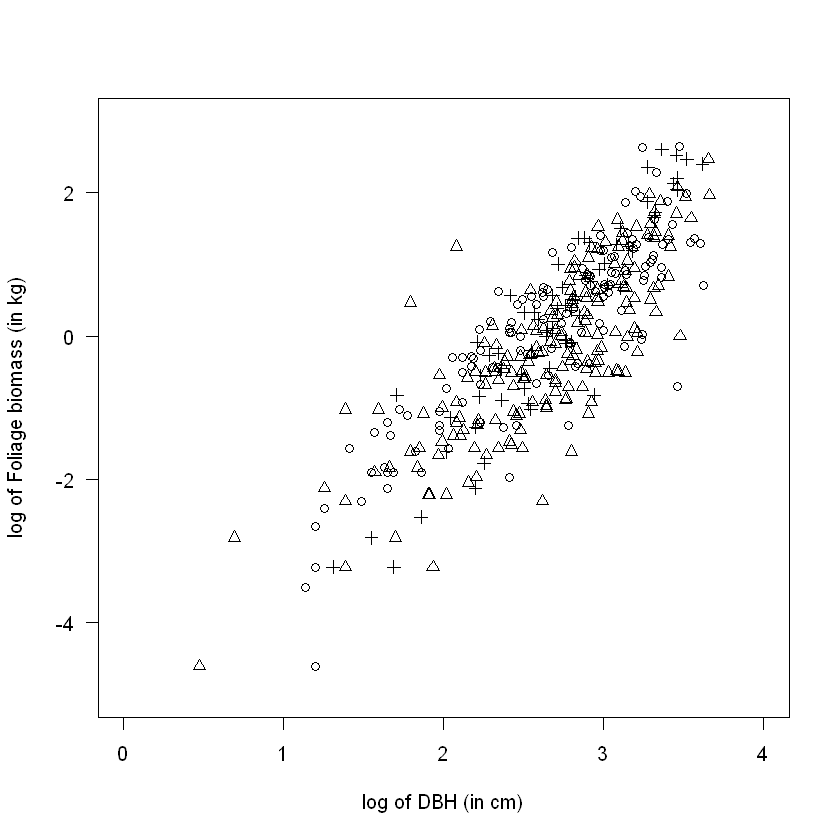

In [4]:
plot( log(Foliage) ~ log(DBH), type="n", las=1,
xlab="log of DBH (in cm)", ylab="log of Foliage biomass (in kg)",
ylim = c(-5, 3), xlim=c(0, 4), data=lime)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Coppice"),
pch=1)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Natural"),
pch=2)
points( log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Planted"),
pch=3)

In [5]:
lime.log <- glm( Foliage ~ log(DBH), family=Gamma(link="log"),
data=lime)

In [6]:
coef(summary(lime.log))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-4.707996,0.18444088,-25.52577,1.164789e-84
log(DBH),1.842207,0.06796062,27.10698,4.190664e-91


In [7]:
t.stat = (coef(summary(lime.log))[2, "Estimate"] - 2)/ coef(summary(lime.log))[2, "Std. Error"]
t.stat
2*pt(abs(t.stat), df=df.residual(lime.log), lower.tail = FALSE)

[1] -2.321829

[1] 0.02076598

In [8]:
mu.2 <- exp(coef(summary(lime.log))[1, "Estimate"] + 2 * log(lime$DBH))
#mu.2

In [9]:
D = sum(2*(-log(lime$Foliage/mu.2) + (lime$Foliage - mu.2)/mu.2))
D

[1] 227.225

In [10]:
L = (deviance(lime.log) - D)/summary(lime.log)$dispersion
L; pchisq(abs(L), df=1, lower.tail = FALSE)

[1] -108.178

[1] 2.456941e-25

In [11]:
deviance(lime.log)/summary(lime.log)$dispersion

[1] 293.6652

In [12]:
df.residual(lime.log)

[1] 383